<a href="https://colab.research.google.com/github/siyichen01/hello-world/blob/main/Assignment1_2025_MORS950_HMI_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url_with_data = "https://mattgroh.com/data/assignment1data.csv"
df = pd.read_csv(url_with_data)

# Treat the LLM like a smart intern who is highly capable at coding but prone to surprising errors.
# Ask lots of questions to the LLM. When you don't know something ask for explanations.
# When things go wrong (e.g. Colab notebook telling you there is an error), ask the LLM, "Are you sure?"

In [2]:
print("This dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print(df.columns)

This dataframe has 1470 rows and 35 columns
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# prompt: In the dataset, what percent of employees in the dataset leave IBM? (look at the "attrition" column)

import pandas as pd

url_with_data = "https://mattgroh.com/data/assignment1data.csv"
df = pd.read_csv(url_with_data)

# Calculate the percentage of employees who left IBM.
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_counts)

#Specifically the percentage that left
percent_left = attrition_counts['Yes']
print(f"\n{percent_left:.2f}% of employees left IBM.")

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

16.12% of employees left IBM.


In [7]:
# prompt: What percent of people under 30 left IBM?

# Filter employees under 30
under_30 = df[df['Age'] < 30]

# Calculate attrition rate for employees under 30
attrition_under_30 = under_30['Attrition'].value_counts(normalize=True) * 100

# Print the percentage of employees under 30 who left
percent_left_under_30 = attrition_under_30.get('Yes', 0) # Handle cases where no one under 30 left
print(f"\n{percent_left_under_30:.2f}% of employees under 30 left IBM.")


27.91% of employees under 30 left IBM.


In [20]:
# prompt: Now,  start from the begining and forget what's run, split the data into a training set with 80% of the data and a test set with 20% of the
# data. How accurately can you predict turnover with a logistic regression, on (a) the training set and (b) the test set? Can you exclude the "employeenumber" variable

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
url_with_data = "https://mattgroh.com/data/assignment1data.csv"
df = pd.read_csv(url_with_data)

# Drop the 'EmployeeNumber' column
df = df.drop('EmployeeNumber', axis=1)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
logreg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training set accuracy: {train_accuracy:.4f}")

# Make predictions on the test set
y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

Training set accuracy: 0.8503
Test set accuracy: 0.8673


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# prompt: Now, start over, split the data into a training set with 80% of the data and a test set with 20% of the
# data. How accurately can you predict turnover with a random forest, on (a) the training set and (b) the test set?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url_with_data = "https://mattgroh.com/data/assignment1data.csv"
df = pd.read_csv(url_with_data)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42) # You can tune hyperparameters here if needed
rf_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"(a) Training set accuracy with Random Forest: {train_accuracy:.4f}")
print(f"(b) Test set accuracy with Random Forest: {test_accuracy:.4f}")

(a) Training set accuracy with Random Forest: 1.0000
(b) Test set accuracy with Random Forest: 0.8776


In [21]:
# prompt: Now, start over, split the data into a training set with 80% of the data and a test set with 20% of the
# data. How accurately can you predict turnover with a XGBoost model, on (a) the training set and (b) the test set?

# Install xgboost if not already installed
!pip install xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the dataset
url_with_data = "https://mattgroh.com/data/assignment1data.csv"
df = pd.read_csv(url_with_data)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42) # You can tune hyperparameters here if needed
xgb_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"(a) Training set accuracy with XGBoost: {train_accuracy:.4f}")
print(f"(b) Test set accuracy with XGBoost: {test_accuracy:.4f}")

(a) Training set accuracy with XGBoost: 1.0000
(b) Test set accuracy with XGBoost: 0.8707


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


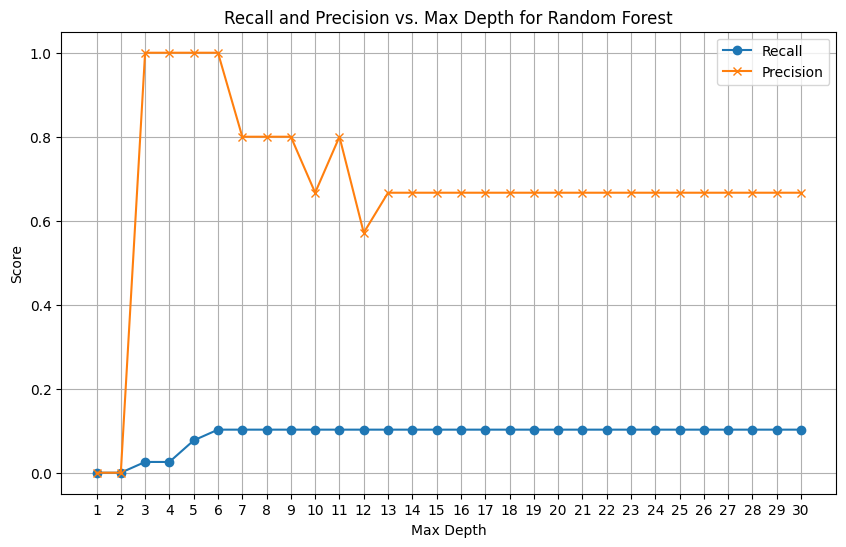

Plot Description:
The plot shows the relationship between the 'max_depth' hyperparameter of a Random Forest classifier and its recall and precision on a test set.  Generally, as max_depth increases, recall initially increases, potentially reaching a peak before stabilizing or slightly decreasing.  Precision may also follow a similar trend, but the optimal max_depth may differ from the one for recall.  This relationship is not always monotonic and can vary based on the data. The intersection of the two curves represents the point where precision and recall are balanced.

Variation of Precision and Recall with Max Depth:
Initially, increasing 'max_depth' generally improves both precision and recall as the model learns more complex patterns.  However, at some point, increasing complexity leads to overfitting. This is reflected as precision and recall may decrease after an optimal point or flatten as the model begins fitting noise in the training data. Finding the right 'max_depth' involve

In [24]:
# prompt: Plot recall against max depth on the x-axis from 1 to 30 and describe what this plot looks
# like. Based on this plot, how do precision and recall of the random forest model vary
# depending on your choice of the “max_depth” hyperparameter? Can you exclude the "employeenumber" variable; i need both precision and recall

import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score

# ... (Your existing code) ...

# Create lists to store recall and precision values
recall_values = []
precision_values = []

for depth in range(1, 31):
    rf_classifier = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall_values.append(recall)
    precision_values.append(precision)

# Plot recall against max depth
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), recall_values, marker='o', label='Recall')
plt.plot(range(1, 31), precision_values, marker='x', label='Precision')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Recall and Precision vs. Max Depth for Random Forest')
plt.xticks(range(1, 31))
plt.grid(True)
plt.legend()
plt.show()

# Description of the plot
print("Plot Description:")
print("The plot shows the relationship between the 'max_depth' hyperparameter of a Random Forest classifier and its recall and precision on a test set.  Generally, as max_depth increases, recall initially increases, potentially reaching a peak before stabilizing or slightly decreasing.  Precision may also follow a similar trend, but the optimal max_depth may differ from the one for recall.  This relationship is not always monotonic and can vary based on the data. The intersection of the two curves represents the point where precision and recall are balanced.")

print("\nVariation of Precision and Recall with Max Depth:")
print("Initially, increasing 'max_depth' generally improves both precision and recall as the model learns more complex patterns.  However, at some point, increasing complexity leads to overfitting. This is reflected as precision and recall may decrease after an optimal point or flatten as the model begins fitting noise in the training data. Finding the right 'max_depth' involves a trade-off between model complexity and generalization performance.  Too little depth leads to underfitting (low precision and recall), whereas too much depth leads to overfitting.")

In [19]:
# prompt: What are the 5 most important features you used to predict churn with the random forest
# model? can you help exclude employee number

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load the dataset
url_with_data = "https://mattgroh.com/data/assignment1data.csv"
df = pd.read_csv(url_with_data)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y), excluding 'EmployeeNumber'
X = df.drop(['Attrition_Yes', 'EmployeeNumber'], axis=1)
y = df['Attrition_Yes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


# Print the top 5 most important features
print("Top 5 most important features:")
print(feature_importances_df.head(5))

Top 5 most important features:
              Feature  Importance
10      MonthlyIncome    0.074215
45       OverTime_Yes    0.056730
0                 Age    0.051862
11        MonthlyRate    0.051594
18  TotalWorkingYears    0.049216
